In [1]:
import pandas as pd
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sn
import matplotlib.mlab as mlab
%matplotlib inline

In [2]:
# Импортируем датасет и избавимся от нулевых строк
df = pd.read_csv('framingham.csv')
df.dropna(axis=0,inplace=True) #избавляемся от строчек с пропущенными значениями

Задача 1:

прогноз риска ишемичсекой болезни сердца в 10 летней перспективе в зависимости от всех имеющихся параметров

In [3]:
# разбиваем датафрейм на две части, dfx - параметры, dfy - целевая переменная. 
dfx = df.drop('TenYearCHD', axis = 1)
dfy = df[['TenYearCHD']] 

In [4]:
# разбиваем датасет на train и test выборку в соотношениии 80% train / 20% test случайным образом
X_train, X_test, y_train, y_test = train_test_split(dfx, dfy, test_size=0.2) 

In [5]:
# используем логистическую регрессию из sklearn. Имя lm - для краткости записи
lm = linear_model.LogisticRegression(solver='liblinear') 
# solver='liblinear' задает алгоритм поиска максимума функции правдоподобия. 

In [6]:
# функция fit обучает регрессию - подбирает коэффициенты
model = lm.fit(X_train, y_train.values.ravel()) 

In [7]:
# выведем коэффициенты модели
model.coef_

array([[ 0.47758863,  0.04863495, -0.08780595, -0.03272051,  0.01964421,
         0.27089712,  0.44375429,  0.63836115,  0.26710773,  0.0016119 ,
         0.01525587, -0.01558028, -0.0143515 , -0.01425876,  0.00509949]])

In [8]:
# выведем коэффициент при константе
model.intercept_

array([-4.80924223])

In [9]:
# возьмем одного пациента из тестовой выборки и сделаем для него прогноз
X_test[:1]

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
2636,0,42,2.0,1,10.0,0.0,0,0,0,173.0,105.0,70.0,21.98,60.0,79.0


In [10]:
# прогноз вероятности отнесения к каждому классу (0 - нет риска, 1 - есть риск)
# первый элемент массива - вероятность класса 0, второй - вероятность класса 1
lm.predict_proba(X_test[:1])

array([[0.94027779, 0.05972221]])

In [11]:
# классификация (0 - нет риска, 1 - есть риск)
lm.predict(X_test[:1])

array([0])

In [12]:
# сделаем prediction классов на всей тестовой выборке
y_pred = lm.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [13]:
y_pred.sum()

8

In [14]:
 # смотрим accuracy модели
lm.score(X_test, y_test)

0.8647540983606558

In [15]:
# смотрим confusion matrix - таблицу правильных и неправильных предсказаний
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix 

array([[630,   5],
       [ 94,   3]])

In [16]:
y_test['TenYearCHD'].value_counts()

0    635
1     97
Name: TenYearCHD, dtype: int64

In [17]:
y_pred.sum()

8

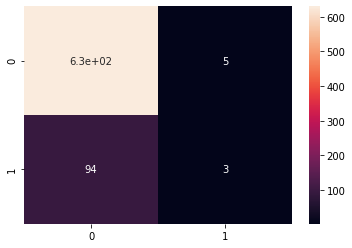

In [18]:
# строим тепловую карту
# Обратите внимание - по строкам расположены настоящие значения классов, а по столбцам - предсказанные
sn.heatmap(cnf_matrix, annot=True)

Выводы:
Наша модель хорошо работает на "здоровых" пациентах и плохо на "больных":
Из 100 (примерно) пациентов группы риска модель нашла около 10 (примерно), это значит, что вероятность ошибки второго рода высока. Для медицинского теста это плохо, поэтому нам нужно более аккуратно выбирать параметры.

Задача 2

прогноз риска ишемической болезни сердца в 10 летней перспективе в зависимости только от пола

Делаем те же самые шаги, но с новыми переменными

In [19]:
list_col=['male']
dfx1 = df[list_col]
dfy1 = df[['TenYearCHD']]

X_train1, X_test1, y_train1, y_test1 = train_test_split(dfx1, dfy1, test_size=0.2)
lm1 = linear_model.LogisticRegression(solver='liblinear') 
model1 = lm1.fit(X_train1, y_train1.values.ravel())

In [20]:
# Выведем коэффициенты модели. 
model1.coef_

array([[0.45477508]])

In [21]:
# выведем коэффициент при константе
model1.intercept_

array([-1.90688561])

In [22]:
# Сделаем предсказания класса для всей тестовой выборки и вычислим accuracy модели

y_pred1 = lm1.predict(X_test1) 
lm1.score(X_test1, y_test1)

0.8592896174863388

In [23]:
# Посмотрим на ошибки предсказания более детально:
cnf_matrix2 = metrics.confusion_matrix(y_test1, y_pred1)
cnf_matrix2

array([[629,   0],
       [103,   0]])

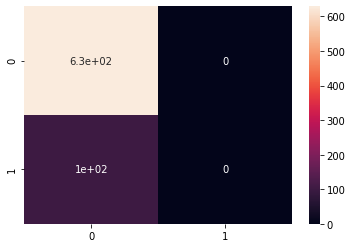

In [24]:
sn.heatmap(cnf_matrix2, annot=True)

Выводы:
Acuuracy модели довольно высока, но если присмотреться, нас ждет сюрприз:
Внезапно модель считает всех пациентов здоровыми. Таким образом, пол сам по себе - бесполезный фактор для классификации.